In [19]:
# Importanto libs necessárias
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [6]:
# Criação das variáveis preditora e alvo

# Criação da variável preditora
x = np.array([ 220, 220, 220, 220, 220, 225, 225, 225, 225, 225, 230, 230, 230, 230, 230, 235, 235, 235, 235, 235])

# Criação da variável alvo
y = np.array([ 137, 137, 137, 136, 135, 135, 133, 132, 133, 133, 128, 124, 126, 129, 126, 122, 122, 122, 119, 122])

# Adicionando uma constante a matriz x
x_sm = sm.add_constant(x)

# Ordinary Least Squares e treinando o modelo utilizando o método fit
results = sm.OLS(y, x_sm).fit()

# Mostrando as estatísticas do modelo
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     291.1
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           1.47e-12
Time:                        00:29:12   Log-Likelihood:                -35.596
No. Observations:                  20   AIC:                             75.19
Df Residuals:                      18   BIC:                             77.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        364.1800     13.765     26.457      0.000     335.261     393.099
x1            -1.0320      0.060    -17.062      0.000      -1.159      -0.905
==============================================================================
Omnibus:                        0.433   Durbin-Watson:                   2.235
Prob(Omnibus):                  0.805   Jarque-Bera (JB):                0.115
Skew:                          -0.182   Prob(JB):                        0.944
Kurtosis:                       2.926   Cond. No.                     9.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
# Mostrando as previsões para o mesmo conjunto
results.predict(x_sm)

array([137.14, 137.14, 137.14, 137.14, 137.14, 131.98, 131.98, 131.98,
       131.98, 131.98, 126.82, 126.82, 126.82, 126.82, 126.82, 121.66,
       121.66, 121.66, 121.66, 121.66])

In [20]:
# Escrevendo o modelo usando scikit-learn
df = pd.DataFrame()
df['x'] = x
df['y'] = y

# x e y como Dataframes
x_v = df[['x']]
y_v = df[['y']]

# Criando e treinando o modelo
model = LinearRegression()
model.fit(x_v, y_v)

# Mostrando o coeficiente (inclui inclinação, e se usar intercept_, mostra o ponto de cruzamento com eixo Y)
print("Coeficiente:", model.coef_)
print("Intercepto:", model.intercept_)

# Mostrando o score R² do modelo
print("R²:", model.score(x_v, y_v))  # Corrigido: agora passa X e y

# Fazendo previsões (usando os mesmos dados para exemplo)
predicoes = model.predict(x_v)
print("Previsões:", predicoes)

Coeficiente (inclinação): -1.0319999999999994
Intercepto: 364.17999999999984
R²: 0.9417657045840407
R²: 0.9417657045840407
Previsões: [[137.14]
 [137.14]
 [137.14]
 [137.14]
 [137.14]
 [131.98]
 [131.98]
 [131.98]
 [131.98]
 [131.98]
 [126.82]
 [126.82]
 [126.82]
 [126.82]
 [126.82]
 [121.66]
 [121.66]
 [121.66]
 [121.66]
 [121.66]]


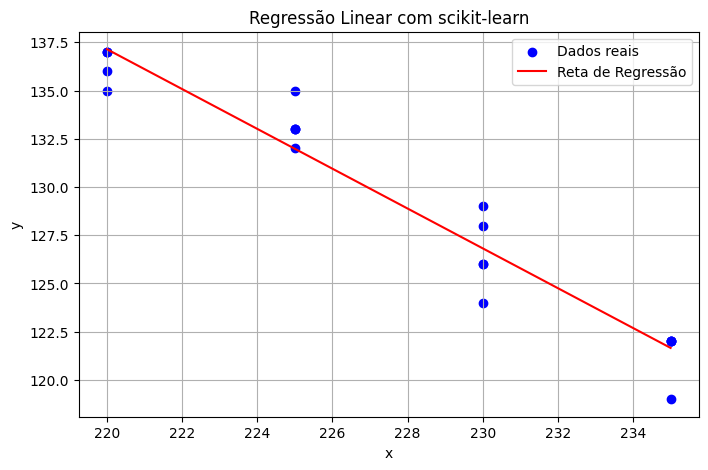

In [21]:
# Visualização
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Dados reais')
plt.plot(x, predicoes, color='red', label='Reta de Regressão')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Linear com scikit-learn')
plt.legend()
plt.grid(True)
plt.show()